# Assignment_Web_Scraping_and_Emotion_Mining

In [33]:
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()

import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

import requests
from bs4 import BeautifulSoup as bs

import warnings
warnings.filterwarnings("ignore")

In [34]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PRASAD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PRASAD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PRASAD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Connecting to Amazon and download reviews

In [35]:
iphone_reviews=[]

In [37]:
for i in range (1,31):
    ip=[]
    url='https://www.amazon.in/AmazonBasics-Semi-Automatic-Washing-Machine/product-reviews/B07V5W3MCB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    iphone_reviews = iphone_reviews+ip

In [38]:
# Downloading review from Amazon.in for the phone I Phone 13 
iphone_reviews = list(set(iphone_reviews))

In [39]:
txt_upd = ' '.join(iphone_reviews)

In [40]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

In [41]:
text_tokens = word_tokenize(txt_upd)

In [42]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

###  Creating the DATAFRAME 

In [43]:
tf = TfidfVectorizer()

In [44]:
text_tf = tf.fit_transform(tokens_without_sw)

In [45]:
feature_names = tf.get_feature_names_out() 
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

In [46]:
df

,adding,amazon,big,blankets,body,buy,clothes,comparison,completely,controls,...,wash,washer,washing,weight,westing,wheels,white,working,worth,yellow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
word_list = ' '.join(df)

In [48]:
wordcloud = WordCloud(background_color='white',width=1800,
                      height=1400).generate(word_list)

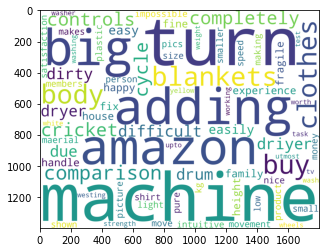

In [49]:
plt.imshow(wordcloud)

## Sentimental Analysis

In [50]:
with open("positive-words.txt","r") as pw:
    positive_words = pw.read().split("\n")

In [51]:
positive_words = positive_words[35:]
positive_words

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [52]:
with open("negative-words.txt","r", encoding='latin-1') as nw:
    negative_words = nw.read().split("\n")

In [53]:
negative_words = negative_words[35:]

In [54]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])

In [55]:
wordcloud_neg = WordCloud(
                      background_color='white',
                      width=1800,
                      height=1400
                     ).generate(txt_neg_in_nw)

In [56]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

In [57]:
wordcloud_pos = WordCloud(
                      background_color='white',
                      width=1800,
                      height=1400
                     ).generate(txt_pos_in_pw)

## Conclusion

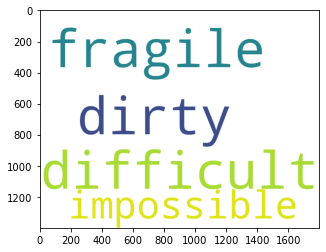

In [58]:
plt.imshow(wordcloud_neg)

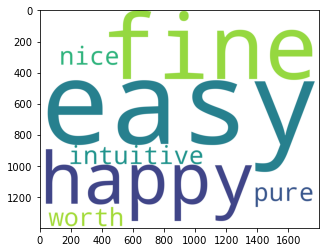

In [59]:
plt.imshow(wordcloud_pos)